### Using Callbacks to control training

### Import data and Normalize it.

Start by importing `tensorflow`.

In [2]:
import tensorflow as tf

In [3]:
# Check the tensorflow version
print(tf.__version__)

2.12.0


Now, let's import the Fashion MNIST dataset to play around with.<br>
The dataset is available in `tf.keras.datasets`.

In [4]:
# Create the MNIST datasets object

fmnist = tf.keras.datasets.fashion_mnist

In [5]:
fmnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

Calling `load_data()` on the object will give us two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.

In [6]:
# Load the training and testing split

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


 Let's print a training image (both as an image and a numpy array), and a training label to see what our data looks like.

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

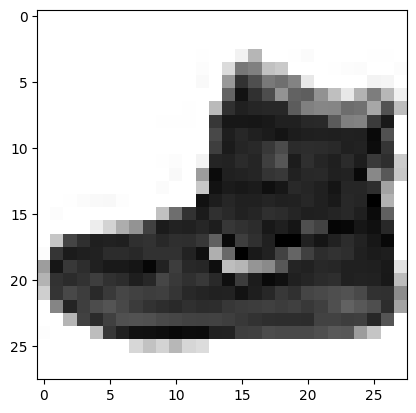

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# We can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index], cmap = "gist_yarg")

We'll notice that all of the values in the number are between 0 and 255. If we are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called *normalization* and we can perform it in following manner. 

In [8]:
# Normalize the pixel values of train and test images

training_images = training_images/255.0
test_images = test_images/255.0

LABEL: 9

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

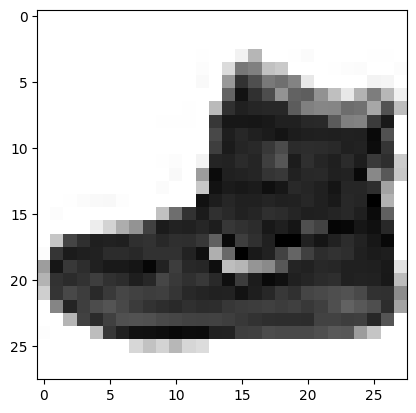

In [9]:
# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index], cmap = "gist_yarg")

### Create Callback class

We can create our callback class by inheriting `tf.keras.callbacks.Callback` base class.<br>
Inside the class, we need to define function `on_epoch_end()` to check the loss at each epoch end.

In [10]:
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs = {}):

    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss')<0.4):

      # Stop if threshold is met
      print("\n Loss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True


# Instantiate class
callbacks = myCallback()

### Let's design our first model

In [14]:
# Build the classification model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [15]:
# Compile the model

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Training the model

While training, we need to specify the callback object that we just instantiated.

In [17]:
# Train the model with callback
model.fit(training_images,training_labels, epochs = 10, callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4758 - accuracy: 0.8308
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3569 - accuracy: 0.8696
 Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3569 - accuracy: 0.8696


We can see that the training didnot go for all 10 epochs and instead stopped after just 2 epoch because it satisfied the threshold function.